In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
import matplotlib.pyplot as plt

### IMPORTING DATA

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/m-maaz-azhar/NLP/main/reviews_by_course.csv")

In [ ]:
data.head()

,Id,Review,Label
0,2-speed-it,BOring,1
1,2-speed-it,Bravo !,5
2,2-speed-it,Very goo,5
3,2-speed-it,"Great course - I recommend it for all, especia...",5
4,2-speed-it,One of the most useful course on IT Management!,5


### SPLITING AND PREPROCESSING DATA

In [ ]:
data = data.dropna() # Dropping NAN Values

In [ ]:
x_data = data["Review"] 
y_data = data["Label"]

In [ ]:
x_data = x_data.astype(str) # converting Dataframe to string

In [ ]:
x_test = x_data.iloc[:15000]
y_test = y_data.iloc[:15000]

x_train = x_data.iloc[len(x_test):]
y_train = y_data.iloc[len(y_test):]

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_data)
sequences = tokenizer.texts_to_sequences(x_data)

In [ ]:
data_ = pad_sequences(sequences,maxlen = 50)

In [ ]:
label,label_test = np.asarray(y_train),np.asarray(y_test)

In [ ]:
encoded = to_categorical(label)
y_test = to_categorical(label_test)

In [ ]:
x_test = data_[:15000]
x_train = data_[len(x_test):]
y_train = encoded

In [ ]:
y_train = np.array(y_train)

### MAKING MODEL

In [ ]:
model = Sequential()
model.add(Embedding(100000, 32))
model.add(LSTM(16))
model.add(Dense(18))
model.add(Dense(10))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

### TRAINING MODEL

In [ ]:
history = model.fit(x_train, y_train,epochs=10,validation_split=0.2)

Epoch 1/10
3133/3133 [==============================] - 59s 17ms/step - loss: 0.6001 - acc: 0.7901 - val_loss: 0.6776 - val_acc: 0.7469
Epoch 2/10
3133/3133 [==============================] - 52s 17ms/step - loss: 0.4966 - acc: 0.8153 - val_loss: 0.6633 - val_acc: 0.7487
Epoch 3/10
3133/3133 [==============================] - 54s 17ms/step - loss: 0.4407 - acc: 0.8355 - val_loss: 0.7215 - val_acc: 0.7431
Epoch 4/10
3133/3133 [==============================] - 52s 17ms/step - loss: 0.3922 - acc: 0.8564 - val_loss: 0.7747 - val_acc: 0.7414
Epoch 5/10
3133/3133 [==============================] - 52s 17ms/step - loss: 0.3503 - acc: 0.8728 - val_loss: 0.8419 - val_acc: 0.7286
Epoch 6/10
3133/3133 [==============================] - 52s 17ms/step - loss: 0.3179 - acc: 0.8854 - val_loss: 0.9396 - val_acc: 0.7213
Epoch 7/10
3133/3133 [==============================] - 52s 17ms/step - loss: 0.2895 - acc: 0.8966 - val_loss: 1.0319 - val_acc: 0.7121
Epoch 8/10
3133/3133 [==========================

In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test,verbose=2)

469/469 - 2s - loss: 1.3300 - acc: 0.7340 - 2s/epoch - 5ms/step


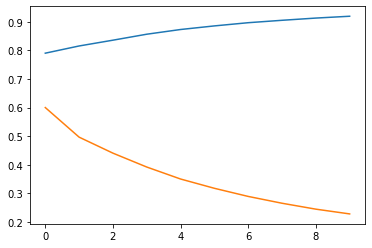

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])